In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings .filterwarnings('ignore')

# Importing Dataset

In [5]:
df = pd.read_csv('global-power-plant.csv')

In [6]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.rename(columns={'primary_fuel':'fuel_type'},inplace=True)

df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel_type,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# EDA

In [36]:
df.shape

(907, 27)

In [37]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
fuel_type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   fuel_type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [39]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
fuel_type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [40]:
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [41]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [45]:
df.drop(columns=['other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [46]:
df.drop(['name'],axis=1,inplace=True)

df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [47]:
df.drop('gppd_idnr',axis=1,inplace=True)

df.drop('owner',axis=1,inplace=True)

df.drop('url',axis=1,inplace=True)

df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
fuel_type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

<AxesSubplot:>

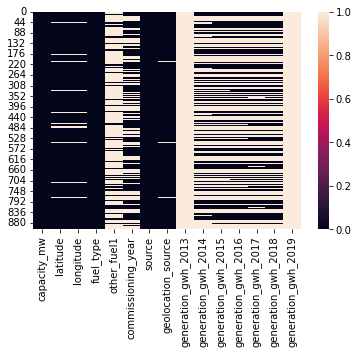

In [48]:
sns.heatmap(df.isnull())

In [49]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

In [50]:
df['latitude'].mean()

21.19791811846691

In [51]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

df['other_fuel1'].mode() 

0    Oil
Name: other_fuel1, dtype: object

In [52]:
df['geolocation_source'].mode()    

0    WRI
Name: geolocation_source, dtype: object

In [66]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# The columns longitude commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh-2016 and generation_gwh_2017 are numerical type and have huge outliers and skewness so will replace missing values using median method
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())
df['generation_gwh_2019']=df['generation_gwh_2019'].fillna(df['generation_gwh_2019'].median())

In [67]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
fuel_type                0
other_fuel1              0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
generation_gwh_2019    907
dtype: int64

<AxesSubplot:>

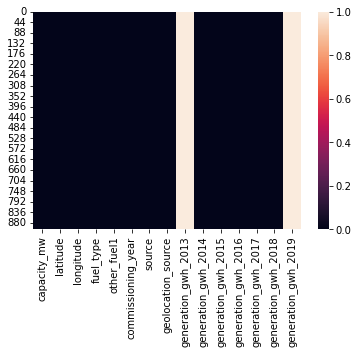

In [68]:
sns.heatmap(df.isnull())

In [71]:
df.columns


Index(['capacity_mw', 'latitude', 'longitude', 'fuel_type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [72]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [79]:
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [80]:
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

df.head()

,capacity_mw,latitude,longitude,fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,3.0


In [81]:
df.loc[df['capacity_mw']==" "]

,capacity_mw,latitude,longitude,fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age


In [82]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
count,907.000000,907.000000,907.000000,0.0,907.000000,907.000000,907.000000,907.000000,907.000000,0.0,907.000000
mean,326.223755,21.197918,77.427103,NaN,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,NaN,19.271224
std,590.085456,6.079148,4.815073,NaN,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,NaN,13.158621
min,0.000000,8.168900,68.644700,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,16.725000,17.072000,74.388900,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,15.000000
50%,59.200000,21.281800,76.719500,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,17.000000
75%,385.250000,25.176450,79.206100,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,20.000000
max,4760.000000,34.649000,95.408000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,91.000000


In [84]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['fuel_type', 'other_fuel1', 'source', 'geolocation_source']


In [85]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'Power_plant_age']


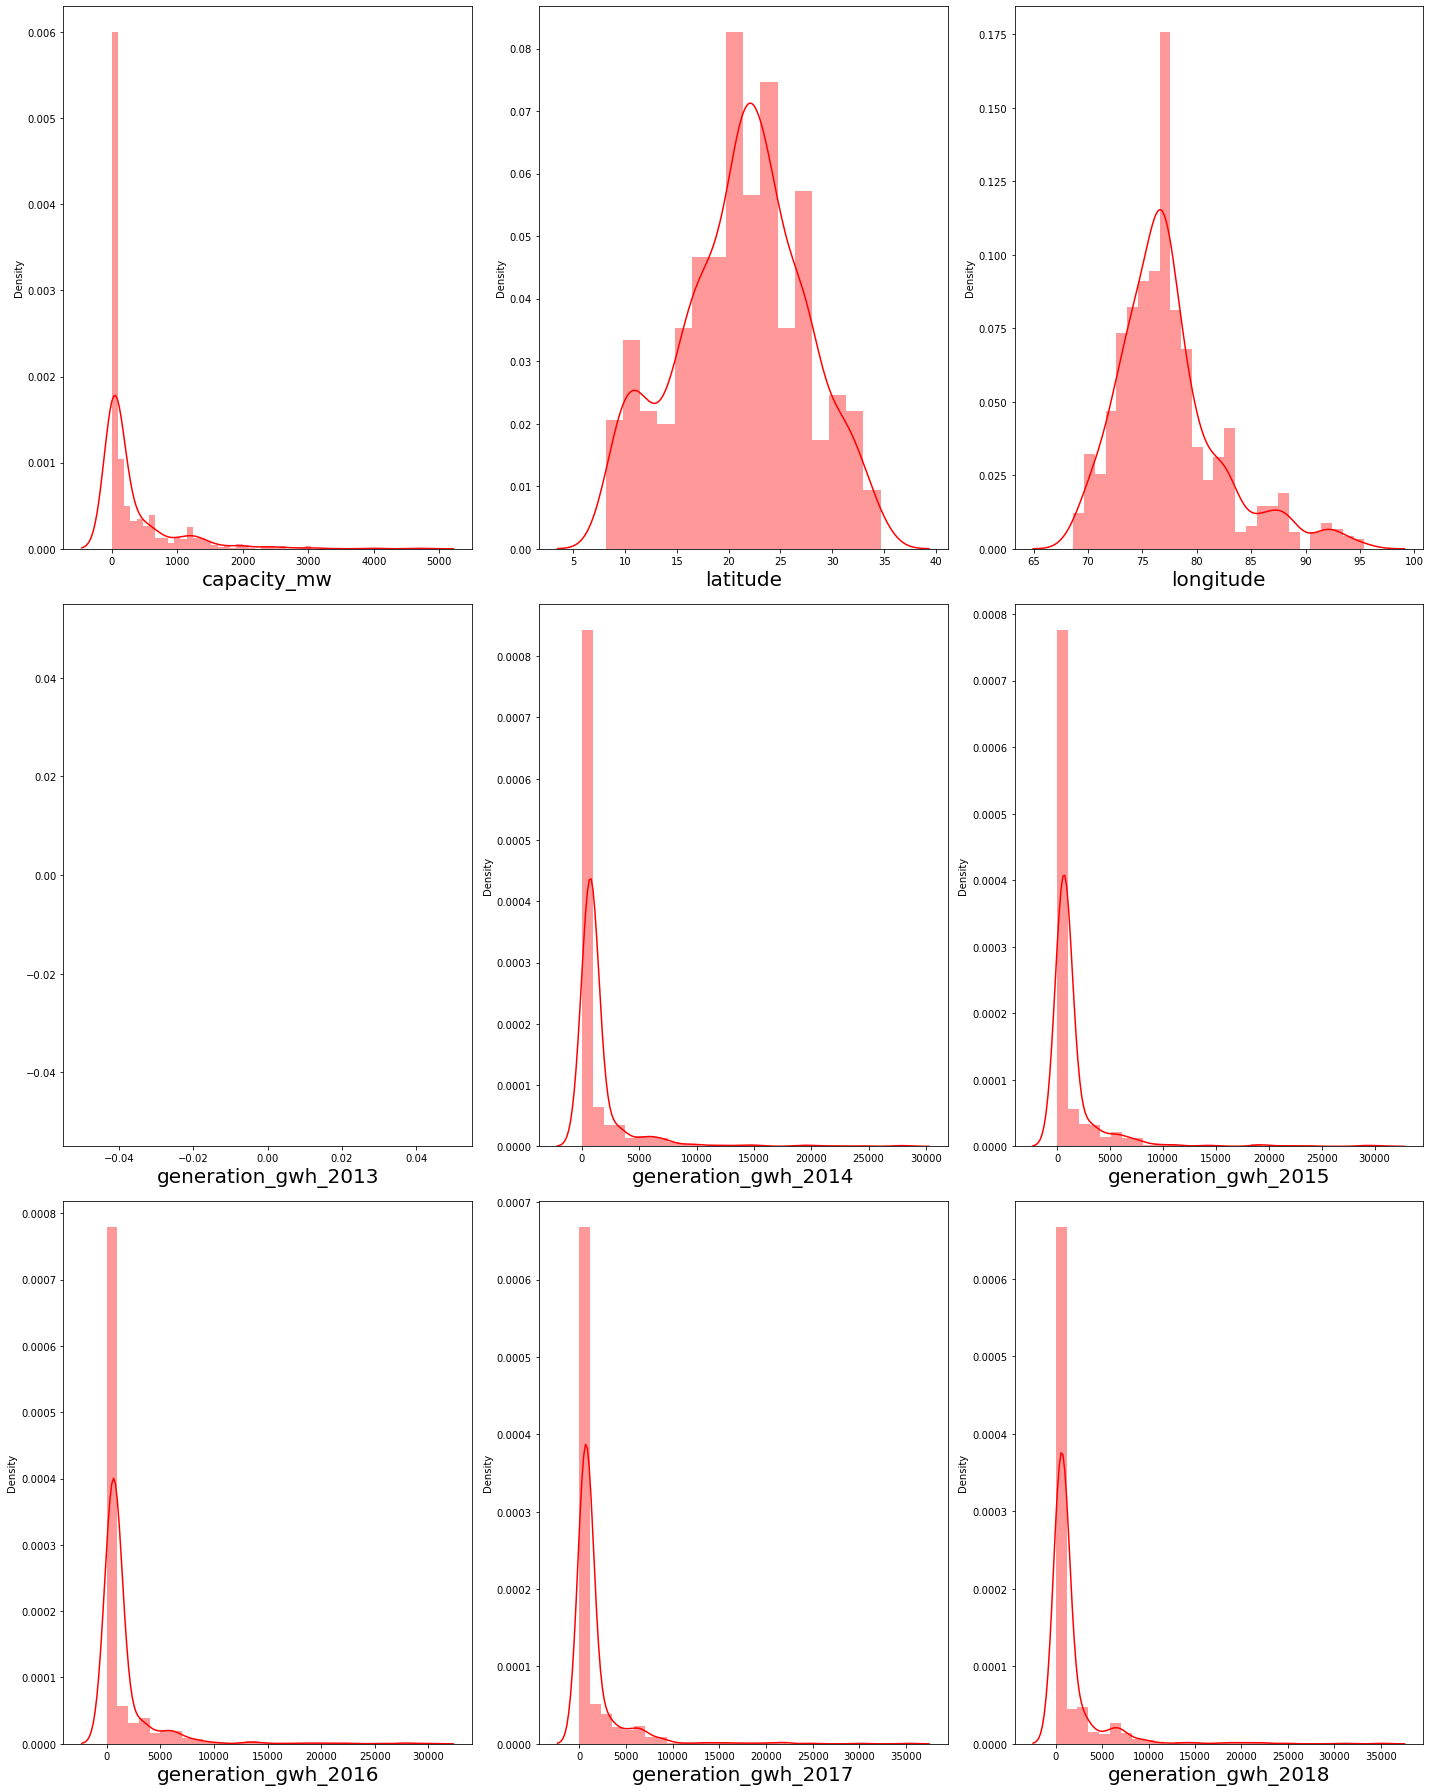

In [89]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Data Visualization

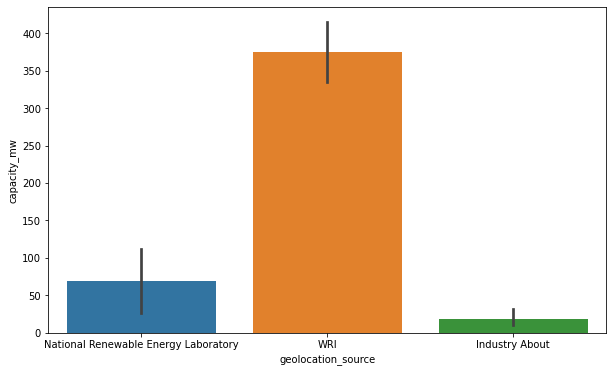

In [90]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

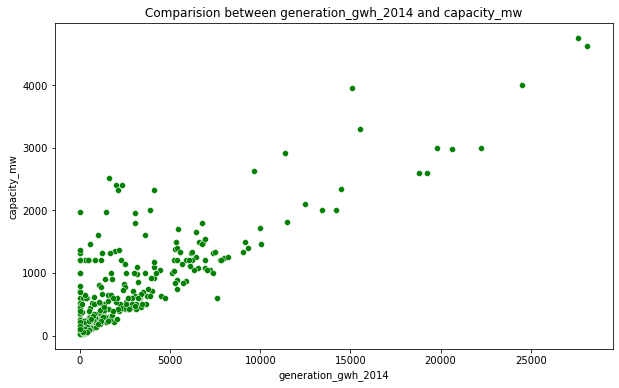

In [13]:
plt.figure(figsize=(10,6))
plt.title('Comparision between generation_gwh_2014 and capacity_mw')
sns.scatterplot(x='generation_gwh_2014', y='capacity_mw', data=df,color='g')
plt.show()

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

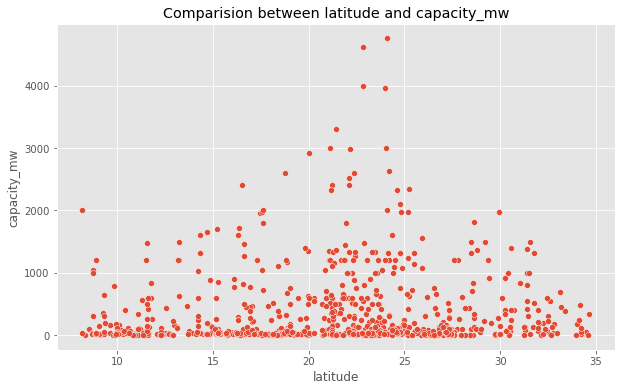

In [93]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df['capacity_mw'])

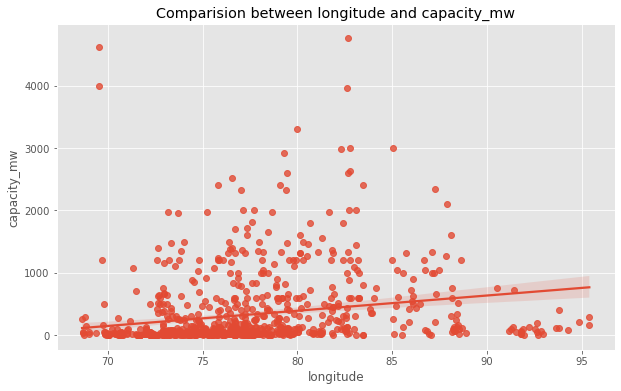

In [94]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df['capacity_mw']);

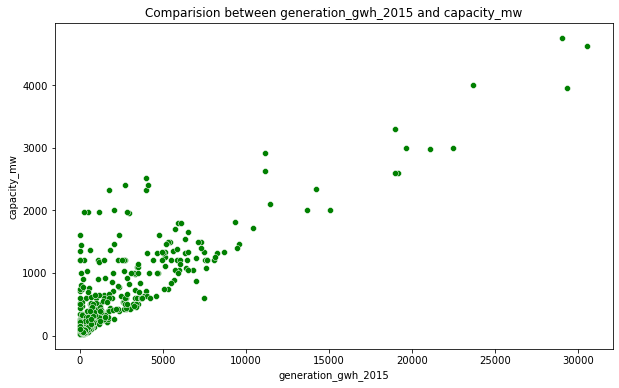

In [14]:
plt.figure(figsize = (10,6))
plt.title('Comparision between generation_gwh_2015 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2015', y = 'capacity_mw', data = df,color='g')
plt.show ()

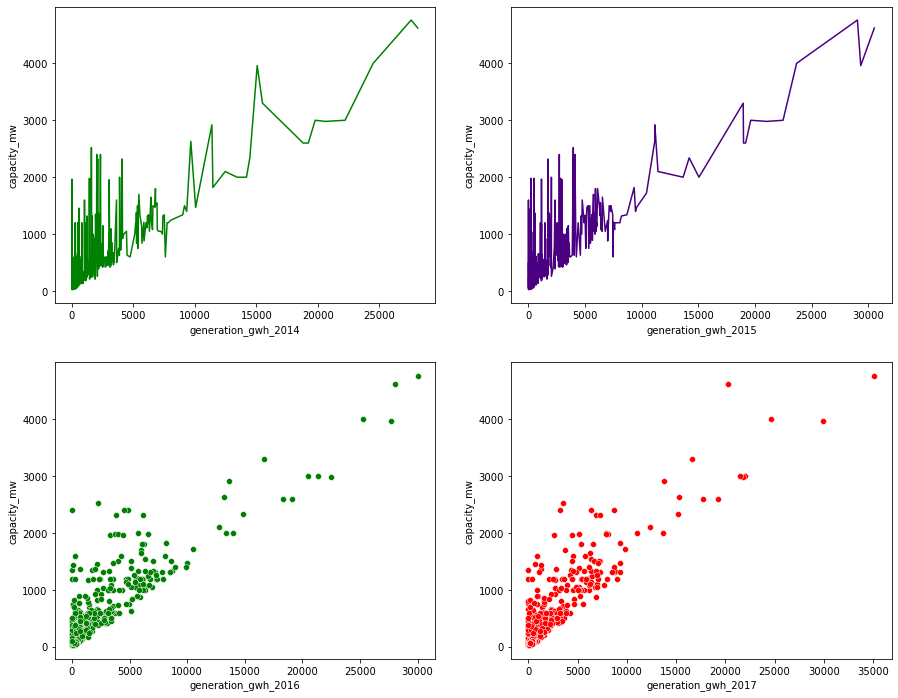

In [9]:
fig,axes=plt.subplots(2,2,figsize=(15,12))


sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df,color='g')
             
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='indigo')
             
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='g')
             
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='r')

plt.show()

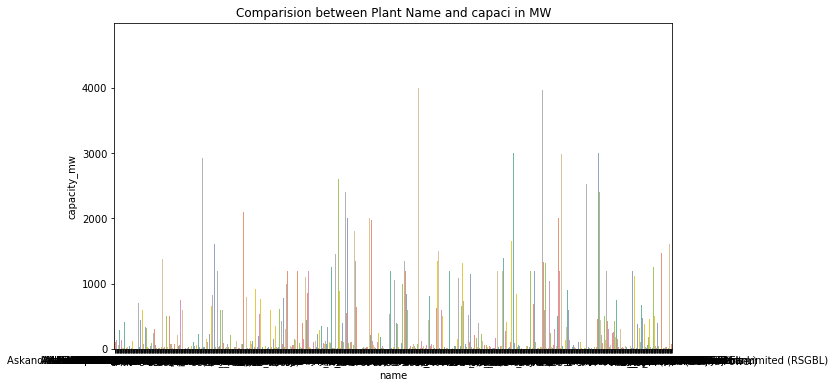

In [21]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Plant Name and capaci in MW")
sns.barplot(x='name',y='capacity_mw', data=df,palette='Set2')
plt.show()

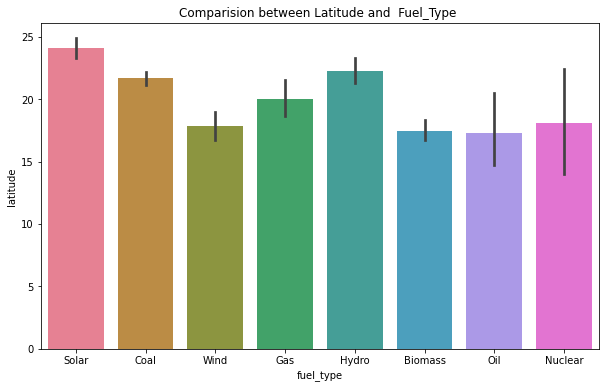

In [22]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Latitude and  Fuel_Type ")
sns.barplot(df['fuel_type'],df['latitude'],palette='husl');

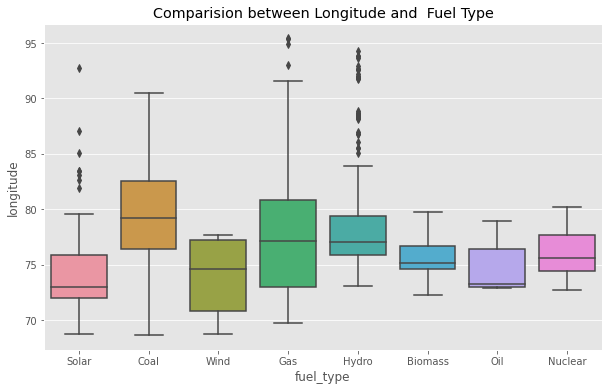

In [23]:
plt.figure(figsize = [10,6])
plt.style.use('ggplot')
plt.title("Comparision between Longitude and  Fuel Type")
sns.boxplot(df['fuel_type'],df['longitude']);

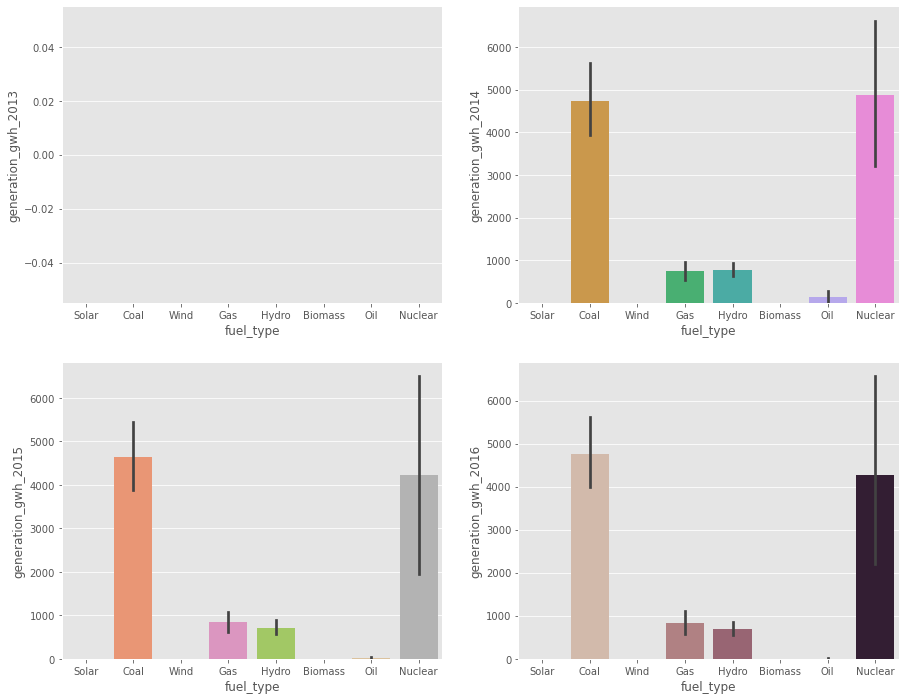

In [25]:
fig,axes=plt.subplots(2,2,figsize=(15,12))


sns.barplot(x='fuel_type',y='generation_gwh_2013',ax=axes[0,0],data=df)
sns.barplot(x='fuel_type',y='generation_gwh_2014',ax=axes[0,1],data=df)


sns.barplot(x='fuel_type',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")
sns.barplot(x='fuel_type',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

# Checking relationships between target

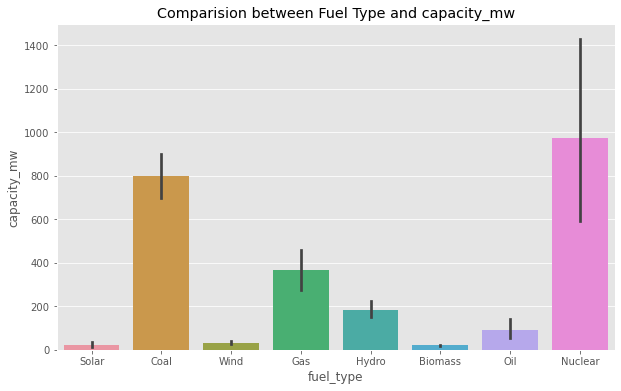

In [26]:
plt.figure(figsize=(10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x= 'fuel_type',y = 'capacity_mw',data = df)
plt.show()

In [ ]:
sns.pairplot(df,hue='capacity_mw',palette='husl')

In [8]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

NameError: name 'numerical_col' is not defined

<Figure size 720x720 with 0 Axes>

In [9]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'fuel_type', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [15]:
features = df[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']]

In [16]:
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
new_df= df[(z<3).all(axis=1)]
new_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh


In [18]:
df.shape

(907, 27)

In [19]:
new_df.shape

(0, 27)

In [26]:
data_loss = (908-852)/908*100
data_loss

6.167400881057269

# IQR method

In [20]:
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(808, 27)

In [21]:
data_loss = (908-422)/908*100
data_loss

53.524229074889874

# Encoding Catogarical column using label encoding

In [40]:
categorical_col = ['other_fuel2','source','geolocation_source']

In [41]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

ValueError: Length of values (0) does not match length of index (3)

# Correlation between target variables and features usig heat map

In [34]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
capacity_mw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


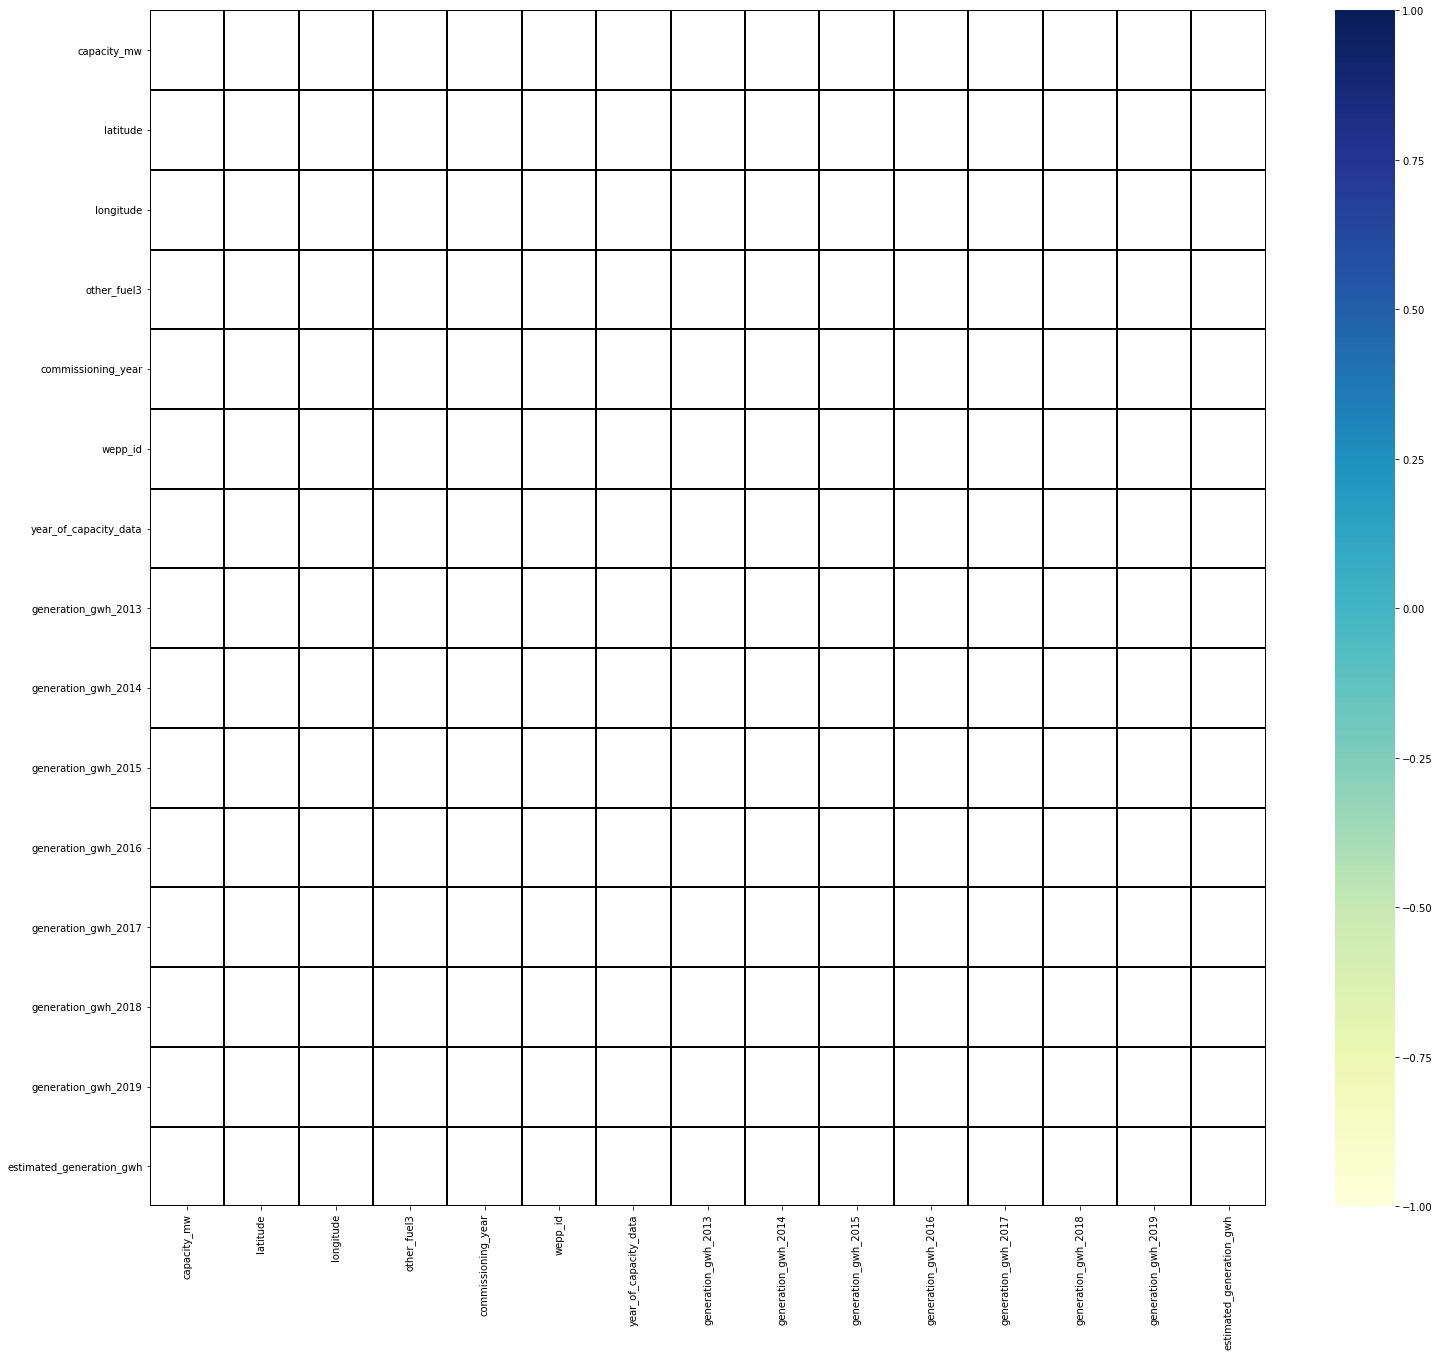

In [35]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

# Visualization correlation between label and features using bar plot

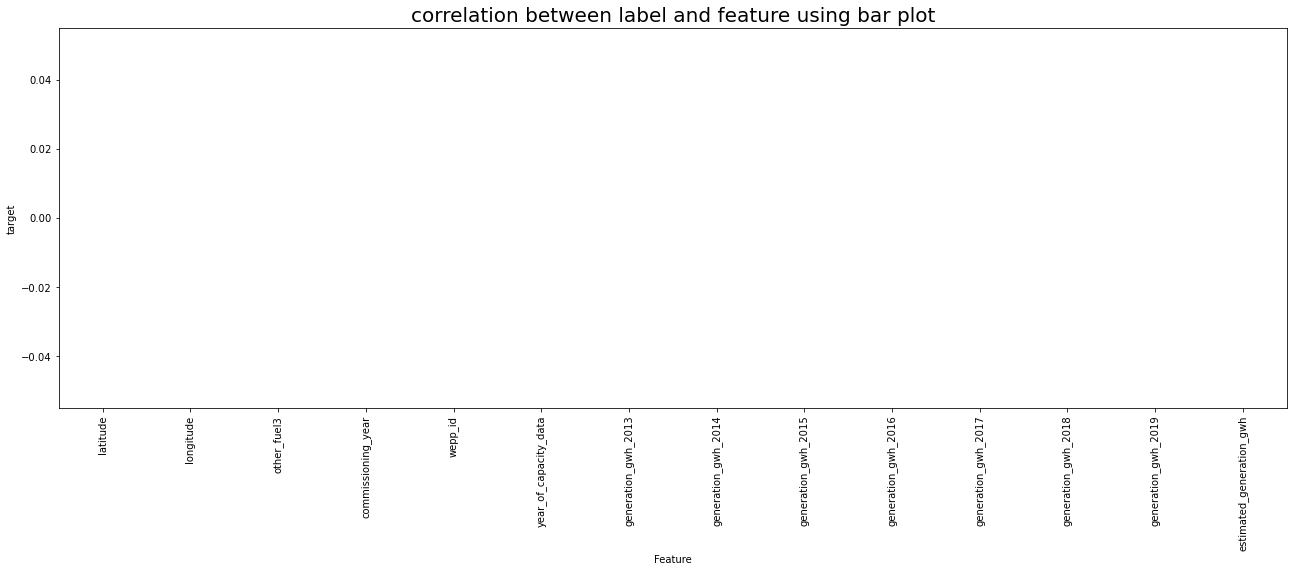

In [42]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [ ]:
# Dropping irrilivant columns

new_df.drop('other_fuel1,axis=1,inplace=True')
new_df.drop('latitude,axis=1,inplace=True')

In [63]:
new_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel2,other_fuel3,commissioning_year,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh


In [ ]:
x= new_df.drop('capacity_mw',axis=1)
y= new_df['capacity_mw']

In [64]:
x.shape

NameError: name 'x' is not defined

In [65]:
y.shape

NameError: name 'y' is not defined

In [46]:
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

new_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel2,other_fuel3,commissioning_year,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh


In [54]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

NameError: name 'x' is not defined

# Checking VIF values

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]
vif['features'] = x.columns


vif

NameError: name 'x' is not defined

In [50]:
x.head()

NameError: name 'x' is not defined